In [222]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten


In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
train ="/content/drive/MyDrive/Colab Notebooks/train"
val = "/content/drive/MyDrive/Colab Notebooks/val"



In [225]:
# Path for train
train_folder = train
# Empty list-Images and labels
images_train = []
labels_train = []
# Image size
image_size_train = (32,32)
# for Loop folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join(train_folder, 'train', str(label))
 # for Loop over each image
 for file in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file)
  if file_path.endswith(('.tiff','.bmp')):
 # Image sizing and loading
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, image_size_train)
 # Append the image and label
    images_train.append(img)
    labels_train.append(label)

images_train = np.array(images_train)
labels_train = np.array(labels_train)
# Save the arrays in NumPy format
np.save('x_train.npy', images_train)
np.save('y_train.npy', labels_train)



In [226]:
# Path for val
train_folder_val = val_path
# Empty list-Images and labels
images_val = []
labels_val = []
# Image size
image_size_val = (32,32)
# for Loop folder from '0' to '9'
for label in range(10):
  folder_path = os.path.join(train_folder_val, 'val', str(label))

 # for Loop over each image
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(('.tiff','.bmp')):
  # Image sizing and loading
      img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, image_size_val)
 # Append the image and label
      images_val.append(img)
      labels_val.append(label)

images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_val.npy', images_val)
np.save('y_val.npy', labels_val)


Data Loading

In [227]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

Image testing whether its loaded correcly or not

1000
178
(1000, 32, 32)
(178, 32, 32)


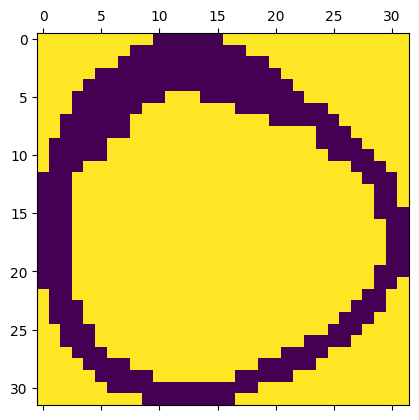

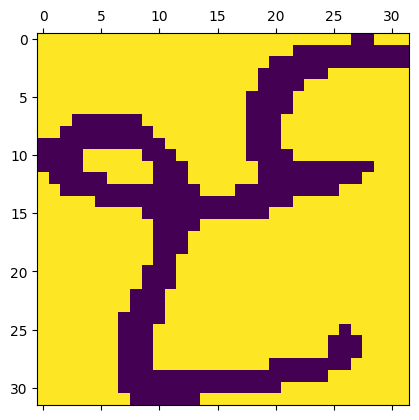

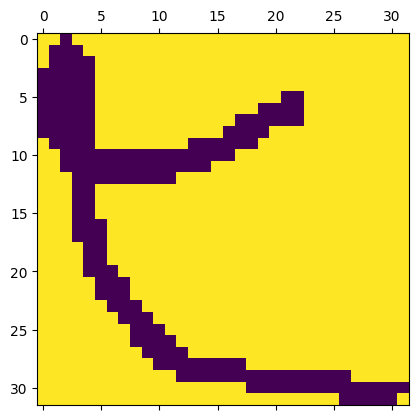

In [228]:
print(len(x_train))
print(len(x_val))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_val.shape)
y_train
y_val
plt.matshow(x_val[150])

In [229]:
# creating nn
# activation function is sigmoid
NeuralNetwork = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
NeuralNetwork.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the NeuralNetwork
# some 10 iterations done here
NeuralNetwork.fit(x_train, y_train,epochs= 10, validation_data=(x_val, y_val))

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 161.9752 - accuracy: 0.4130 - val_loss: 67.4347 - val_accuracy: 0.6461
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 24.6548 - accuracy: 0.8060 - val_loss: 30.6838 - val_accuracy: 0.7247
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 14.1614 - accuracy: 0.8670 - val_loss: 20.1204 - val_accuracy: 0.8090
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 6.4785 - accuracy: 0.9210 - val_loss: 14.5318 - val_accuracy: 0.8315
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 4.8784 - accuracy: 0.9410 - val_loss: 10.4486 - val_accuracy: 0.8876
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 3.6362 - accuracy: 0.9460 - val_loss: 13.0000 - val_accuracy: 0.8652
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 4.3385 - accuracy: 0.9420 - val_loss: 15.3890 - val_accuracy: 0.8483
Epoch 8/1

In [230]:
# Observation : we see a better accuracy from the 2nd iteration

In [231]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_val_scaled = x_val/255
NeuralNetwork.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_val_scaled, y_val))

Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 0.8206 - accuracy: 0.8480 - val_loss: 1.1632 - val_accuracy: 0.6854
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.8426 - accuracy: 0.8130 - val_loss: 1.1023 - val_accuracy: 0.7360
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7912 - accuracy: 0.8690 - val_loss: 1.0471 - val_accuracy: 0.7640
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7517 - accuracy: 0.8980 - val_loss: 1.0079 - val_accuracy: 0.7753
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7222 - accuracy: 0.9210 - val_loss: 0.9797 - val_accuracy: 0.7978
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7005 - accuracy: 0.9360 - val_loss: 0.9553 - val_accuracy: 0.8202
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6828 - accuracy: 0.9600 - val_loss: 0.9381 - val_accuracy: 0.8258
Epoch 8/10
32/32 [=

In [232]:
# Observation : we got better result for all iterations on scaling the training dataset

In [234]:
# evaluate test dataset
NeuralNetwork.evaluate(x_val_scaled,y_val)


6/6 [==============================] - 0s 4ms/step - loss: 0.9028 - accuracy: 0.8652


[0.9028478264808655, 0.8651685118675232]

In [235]:

# Observation : result almost same as the training dataset,

6/6 [==============================] - 0s 6ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


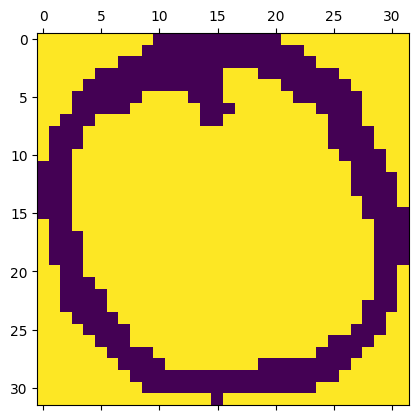

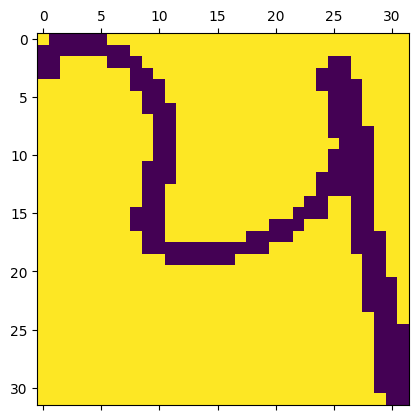

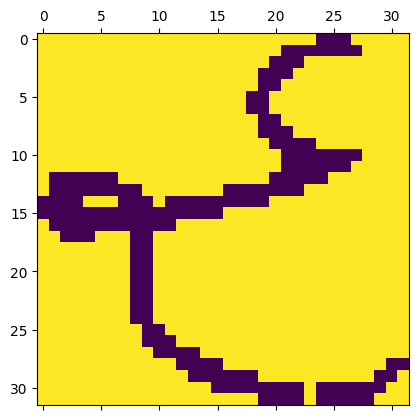

In [238]:
# predict 1st image
plt.matshow(x_val[0])
y_predicted = NeuralNetwork.predict(x_val_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_val[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_val[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [239]:

# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_val, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 7, 7, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 2, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 5, 3, 3, 3, 3, 2, 3, 3, 2, 1, 9, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 7, 4, 4, 4, 7, 4, 4, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 6, 6, 6, 6, 6, 6, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[16,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 11,  1,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 11,  2,  0,  1,  0,  2,  0,  1],
       [ 0,  1,  2, 13,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 14,  1,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 16,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(158.22222222222223, 0.5, 'Actual')

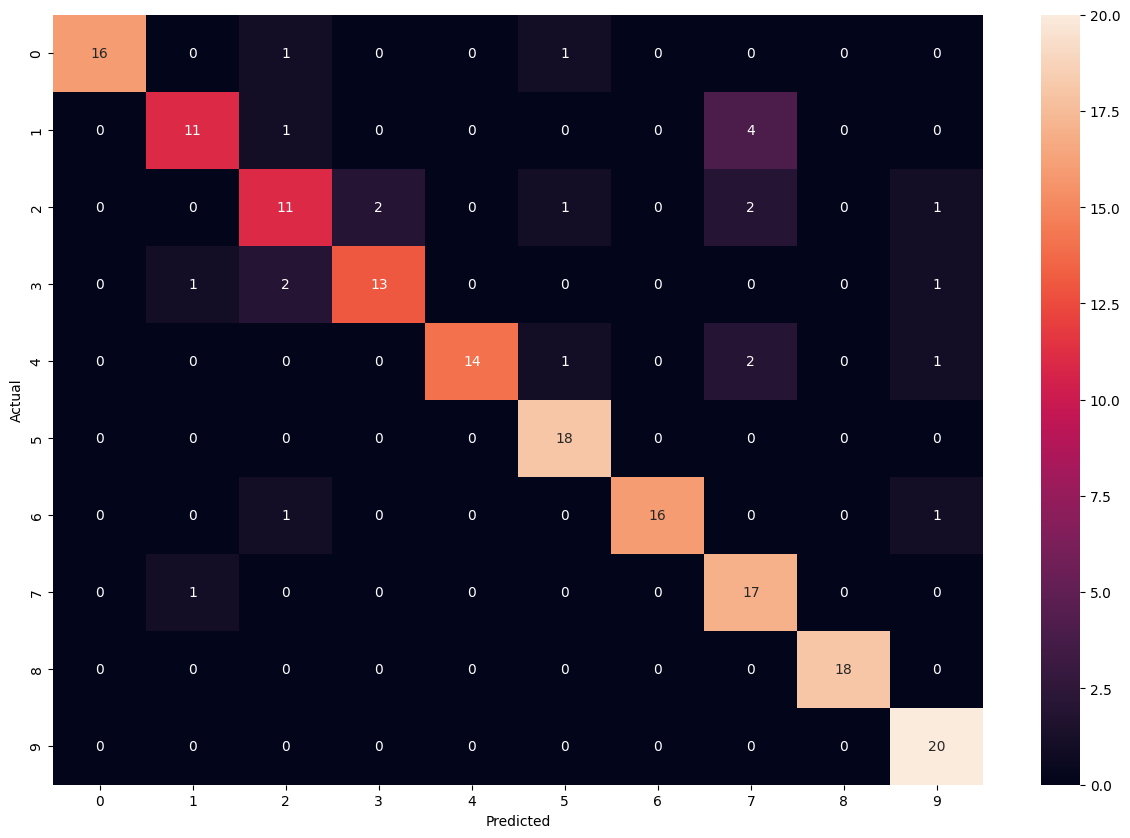

In [240]:
import seaborn as sn
plt.figure(figsize = (15,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [241]:
# we need to modify 

In [242]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
nn2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
nn2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the nn
# some 10 iterations done here
history = nn2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_val_scaled, y_val))

Epoch 1/10
32/32 [==============================] - 1s 23ms/step - loss: 1.0836 - accuracy: 0.7110 - val_loss: 0.4193 - val_accuracy: 0.8708
Epoch 2/10
32/32 [==============================] - 1s 19ms/step - loss: 0.1843 - accuracy: 0.9410 - val_loss: 0.3843 - val_accuracy: 0.8708
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 0.1843 - accuracy: 0.9420 - val_loss: 0.3803 - val_accuracy: 0.8989
Epoch 4/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0861 - accuracy: 0.9750 - val_loss: 0.2509 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0487 - accuracy: 0.9900 - val_loss: 0.1912 - val_accuracy: 0.9438
Epoch 6/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0410 - accuracy: 0.9900 - val_loss: 0.1727 - val_accuracy: 0.9607
Epoch 7/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0259 - accuracy: 0.9970 - val_loss: 0.1804 - val_accuracy: 0.9607
Epoch 8/10
32

In [243]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified nn
nn2.evaluate(x_val_scaled,y_val)


6/6 [==============================] - 0s 7ms/step - loss: 0.1564 - accuracy: 0.9607


[0.15639875829219818, 0.9606741666793823]

In [244]:
# Earlier we got 0.8651685118675232 now we got 0.9606741666793823 accuracy
# redo the confusion matrix
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = nn2.predict(x_val_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_val, predictions=y_predicted_labels)
conf_mat


6/6 [==============================] - 0s 5ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

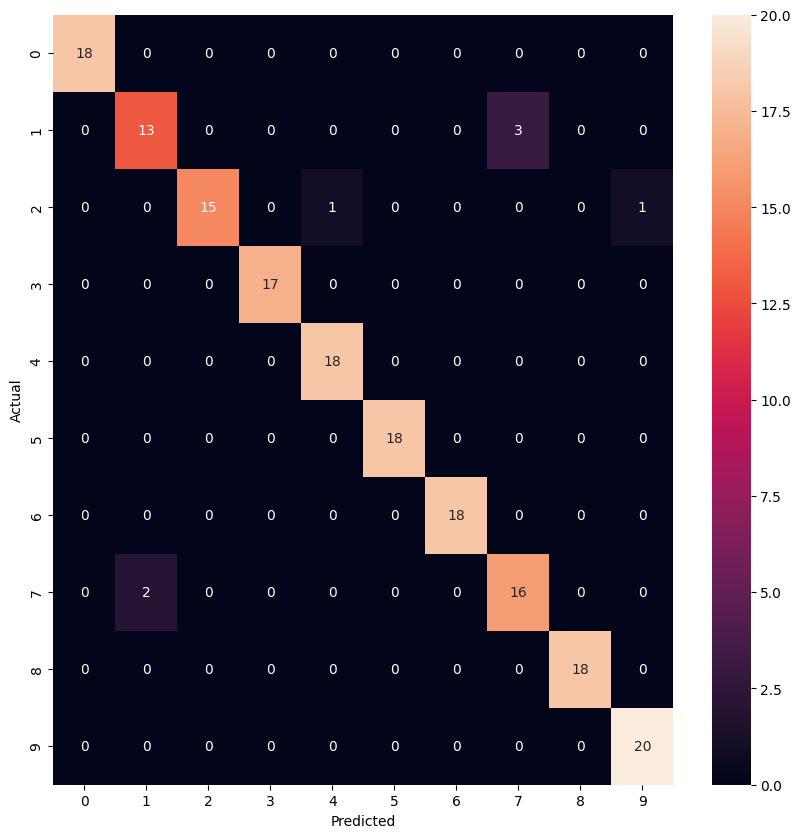

In [245]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 3ms/step - loss: 19.7807 - accuracy: 0.8371
Test accuracy: 0.8370786309242249


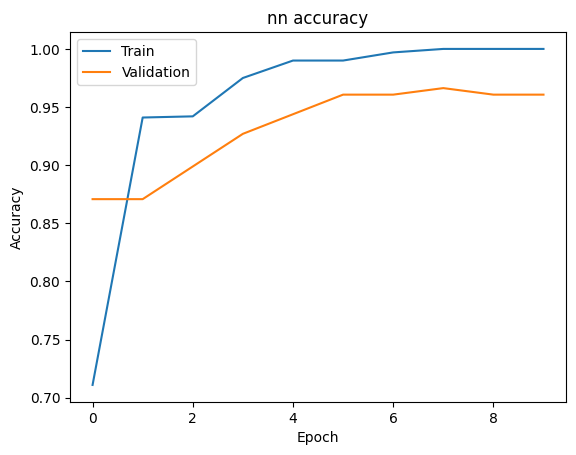

In [247]:
# Observatoin : we see in the updated nn, there are less number of errors,
# whatever is not in diagonal is a error
# Evaluate the nn
test_loss, test_acc = NeuralNetwork.evaluate(x_val, y_val)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('nn accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()